In [1]:
import numpy as np
import pandas as pd
from numpy.random import default_rng

import scipy
import matplotlib.pyplot as plt
from tqdm import tqdm
from typing import Callable, List, Tuple

A1, A10 = 1, 10
sizes = np.array([1,10,100,1000,10000])

## Gaussian

In [2]:
def get_gaussian_estimates(n_iterations : int):

    """
    Generate a Gaussian distribution with a mean of 0 and standard deviation of 1.
    Then, generate n_iterations samples from this distribution and calculate the mean and standard deviation.
    """

    # Generate a Gaussian distribution
    mu = 0
    sigma = 1

    A_1 = [[] for i in range(len(sizes))] ; A_10 = [[] for i in range(len(sizes))]

    for i in tqdm(range(n_iterations)):

        for i,size in enumerate(sizes):

            # Generate samples from the Gaussian distribution
            samples1 = A1 + np.random.normal(mu, sigma, size=size)
            samples10 = A10 + np.random.normal(mu, sigma, size=size)

            # Calculate the mean and standard deviation from the samples
            A_hat_1 = np.mean(samples1)
            A_hat_10 = np.mean(samples10)

            A_1[i].append(A_hat_1)
            A_10[i].append(A_hat_10)

    # Store the results in a DataFrame
    results_df = pd.DataFrame({
        'sizes': sizes,
        'mean1': [np.mean(x) for x in A_1],
        'variance1': [np.var(x) for x in A_1],
        'mean10': [np.mean(x) for x in A_10],
        'variance10': [np.var(x) for x in A_10],
    })

    return results_df, np.array(A_1), np.array(A_10)

gaussian_results, Gaussian_A1, Gaussian_A10 = get_gaussian_estimates(1000)
gaussian_results.head()

100%|██████████| 1000/1000 [00:00<00:00, 1486.19it/s]


,sizes,mean1,variance1,mean10,variance10
0,1,1.068402,1.028088,10.012143,1.036899
1,10,1.025188,0.099716,9.997226,0.095666
2,100,1.002946,0.009878,9.999809,0.009509
3,1000,0.999103,0.000988,9.999444,0.001151
4,10000,0.999691,0.000100,9.999892,0.000098


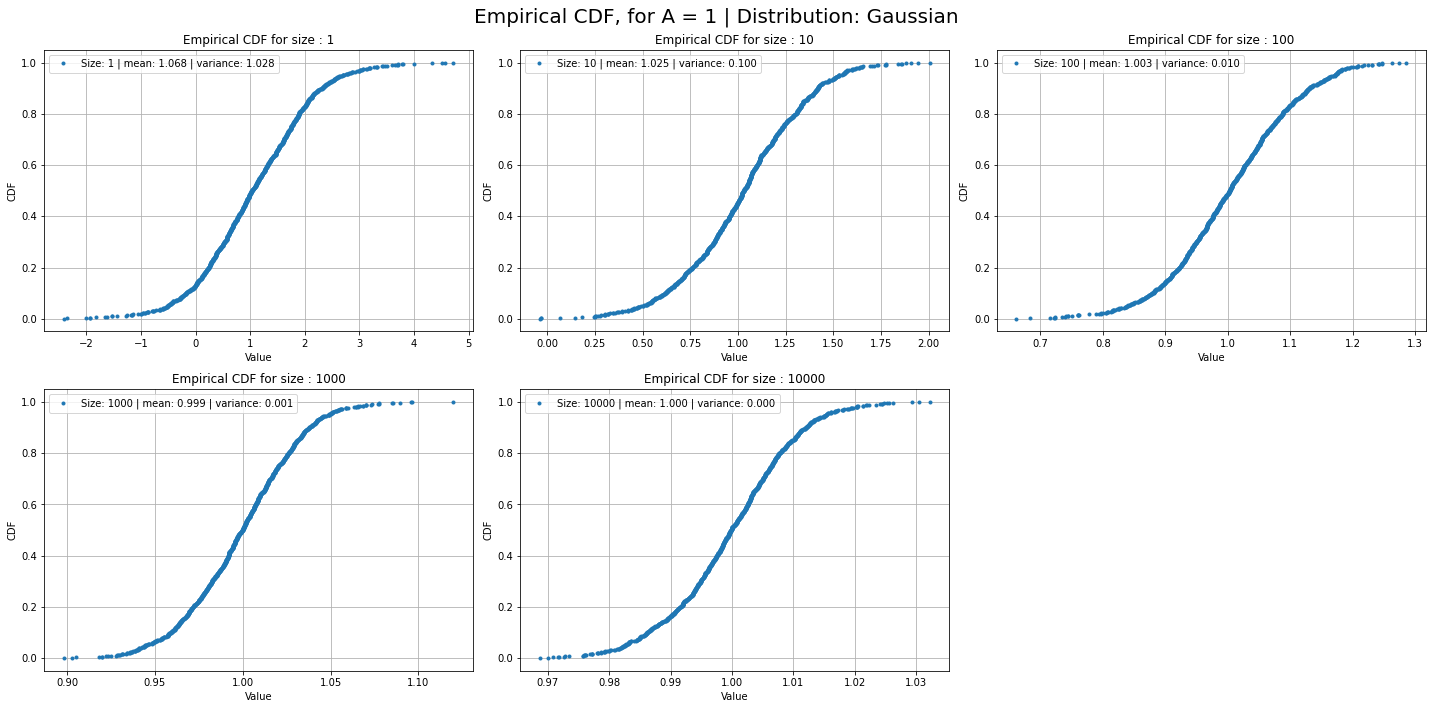

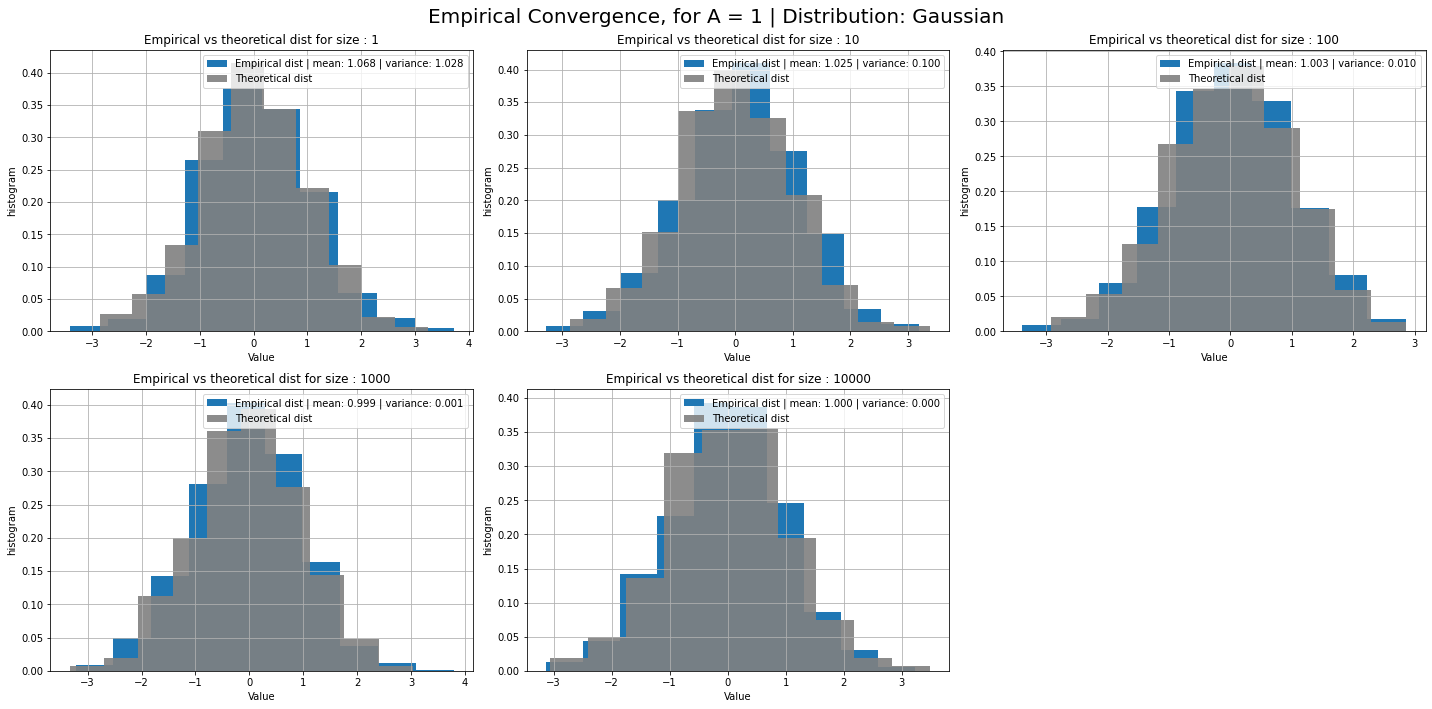

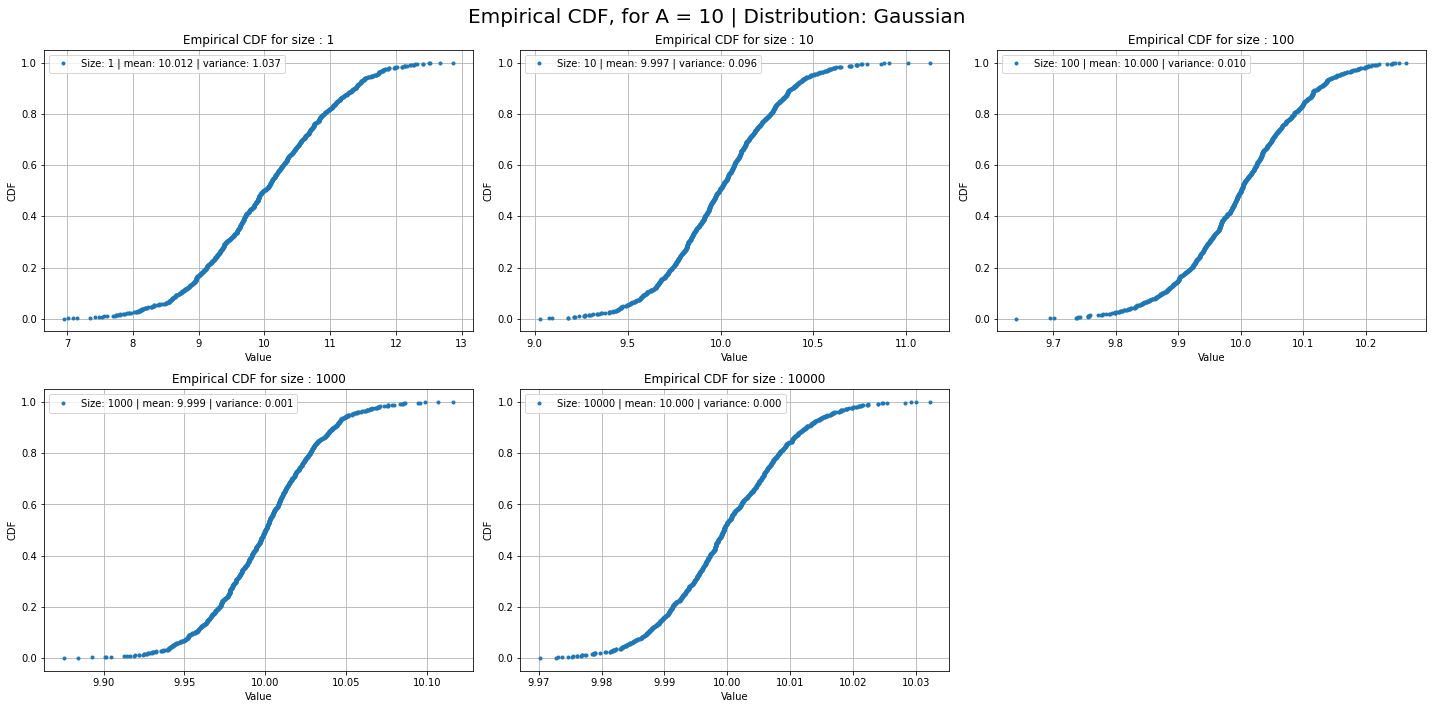

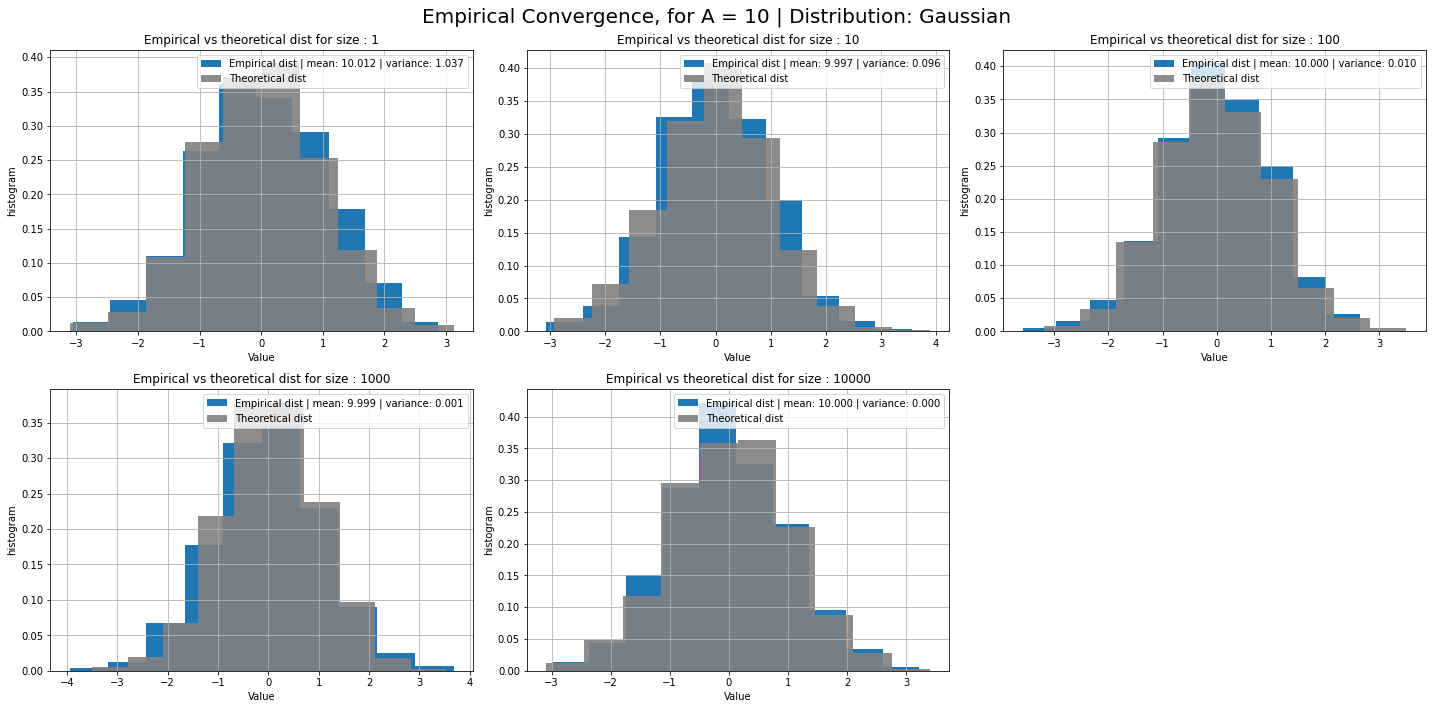

In [6]:
# Plotting the CDF for each sample sizes of A1 and A10
# Sort the data

def plot_cdf(data : List, A = 1, dist = "Gaussian"):
    
        """
        Plot the CDF of the data.
        """
        plt.figure(figsize=(20, 10))
        plt.suptitle(f'Empirical CDF, for A = {A} | Distribution: {dist}', fontsize=20)
        plt.subplots_adjust(hspace=0.4, wspace=0.4)

        for i,size in enumerate(sizes):
            
            # Sort the data
            sorted_data = np.sort(data[i])
            plt.subplot(2, 3, i+1)
        
            # Calculate the cumulative probabilities
            cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
            mean, var = np.mean(data[i]), np.var(data[i])

            plt.plot(sorted_data, cdf, marker='.', linestyle='none', label = f'Size: {size} | mean: {mean:.3f} | variance: {var:.3f}')
            plt.xlabel('Value')
            plt.ylabel('CDF')
            plt.title(f'Empirical CDF for size : {size}')
            plt.grid(True)
            plt.legend(loc = 'best')
            plt.tight_layout()

        plt.savefig(f'./images/{dist}_cdf_A{A}.png', dpi=300, bbox_inches='tight', facecolor='w')
        plt.show()
        plt.close()

def convergence_plot(data : List, fisher_info : float = 1.0, A = 1, dist = "Gaussian"):
        """
        Plot the Convergence of the data.
        """
        plt.figure(figsize=(20, 10))
        plt.suptitle(f'Empirical Convergence, for A = {A} | Distribution: {dist}', fontsize=20)
        plt.subplots_adjust(hspace=0.4, wspace=0.4)

        for i,size in enumerate(sizes):
            empirical_dist = (size**0.5) * (data[i] - A)
            Theoretical_dist = np.random.normal(0, (fisher_info)**(-0.5), size = len(data[i]) )

            plt.subplot(2, 3, i+1)
        
            # Calculate the stats
            mean, var = np.mean(data[i]), np.var(data[i])

            plt.hist(empirical_dist, linestyle='none', label = f'Empirical dist | mean: {mean:.3f} | variance: {var:.3f}', density = True)
            plt.hist(Theoretical_dist, linestyle='none', label = f'Theoretical dist', alpha = 0.9, color = 'gray', density = True)
            plt.xlabel('Value')
            plt.ylabel('histogram')
            plt.title(f'Empirical vs theoretical dist for size : {size}')
            plt.grid(True)
            plt.legend(loc = 'best')
            plt.tight_layout()

        plt.savefig(f'./images/{dist}_convergence_A{A}.png', dpi=300, bbox_inches='tight', facecolor='w')
        plt.show()
        plt.close()

plot_cdf(Gaussian_A1, A = 1, dist = "Gaussian")
convergence_plot(Gaussian_A1, A = 1, dist = "Gaussian")

plot_cdf(Gaussian_A10, A = 10, dist = "Gaussian")
convergence_plot(Gaussian_A10, A = 10, dist = "Gaussian")

### For laplace

In [7]:
def get_laplace_estimates(n_iterations : int):

    """
    Generate a Laplacian distribution with a mean of 0 and standard deviation of 1/(2**0.5).
    """
    mu = 0
    b = 1/(2**0.5)
    A_1 = [[] for i in range(len(sizes))] ; A_10 = [[] for i in range(len(sizes))]

    for i in tqdm(range(n_iterations)):

        for i,size in enumerate(sizes):

            # Generate samples from the Laplace distribution
            samples1 = A1 + np.random.laplace(mu, b, size=size)
            samples10 = A10 + np.random.laplace(mu, b, size=size)

            # Calculate the mean and standard deviation from the samples
            A_hat_1 = np.median(samples1)
            A_hat_10 = np.median(samples10)

            A_1[i].append(A_hat_1)
            A_10[i].append(A_hat_10)

    # Store the results in a DataFrame
    results_df = pd.DataFrame({
        'sizes': sizes,
        'mean1': [np.mean(x) for x in A_1],
        'variance1': [np.var(x) for x in A_1],
        'mean10': [np.mean(x) for x in A_10],
        'variance10': [np.var(x) for x in A_10],
    })

    return results_df, np.array(A_1), np.array(A_10)

laplace_results, Laplace_A1, Laplace_A10 = get_laplace_estimates(1000)
laplace_results.head()

100%|██████████| 1000/1000 [00:00<00:00, 1120.85it/s]


,sizes,mean1,variance1,mean10,variance10
0,1,1.001082,0.920829,10.043388,1.166117
1,10,1.003767,0.073230,9.990949,0.080585
2,100,0.997637,0.005490,10.001997,0.005404
3,1000,1.000331,0.000524,9.999910,0.000524
4,10000,0.999810,0.000049,9.999547,0.000049


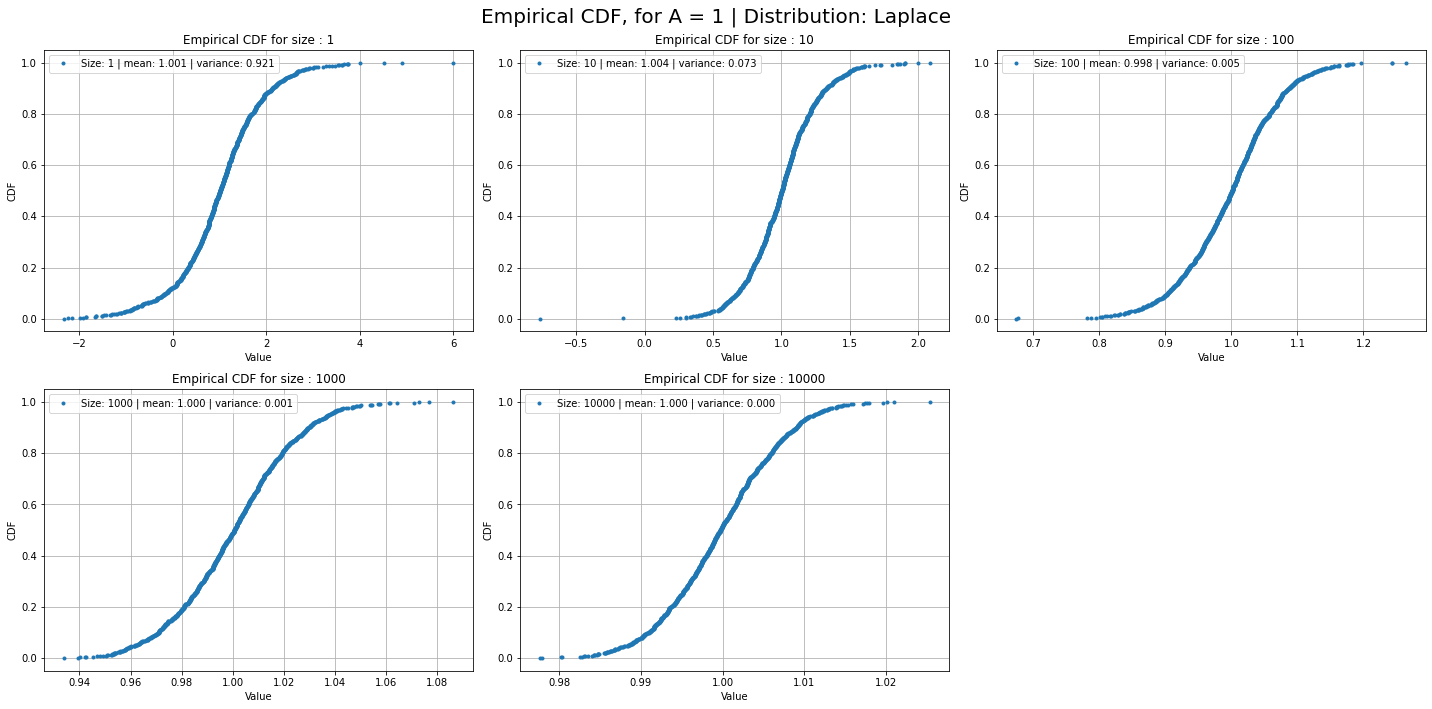

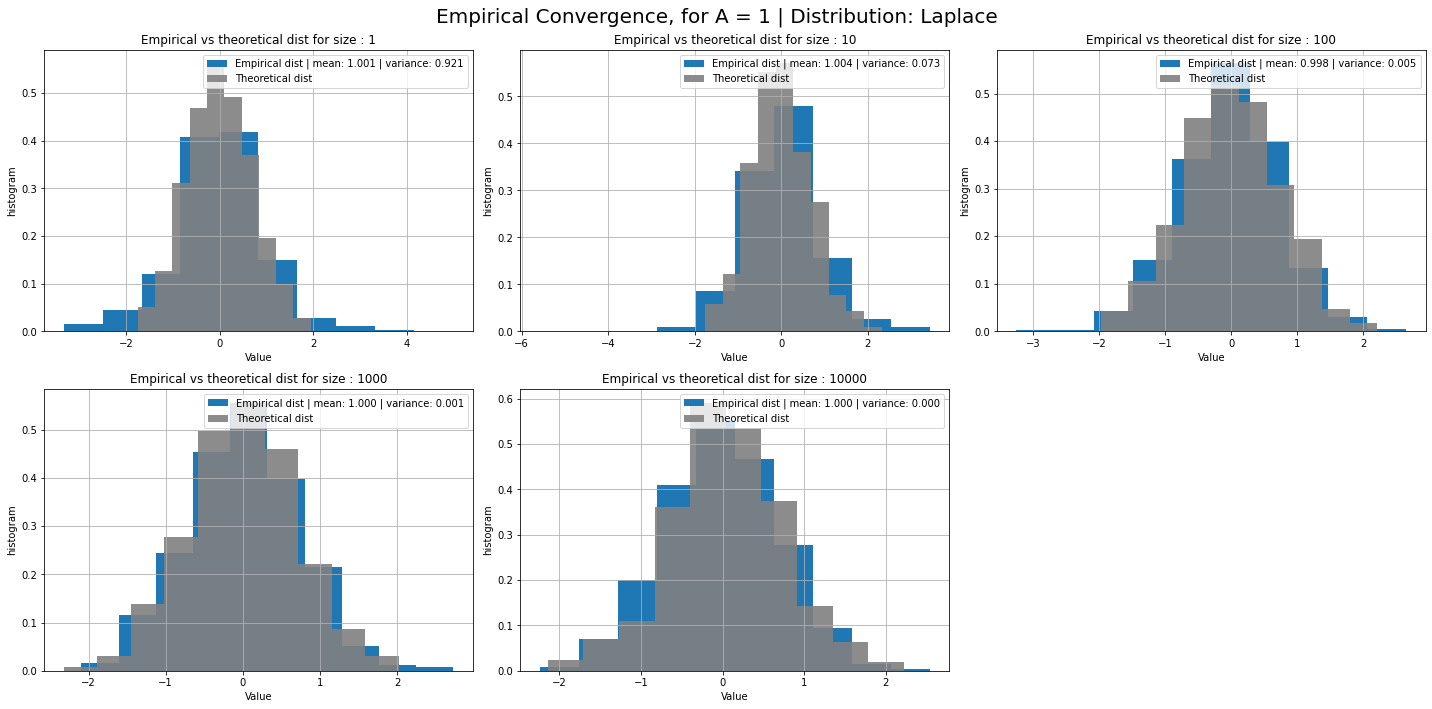

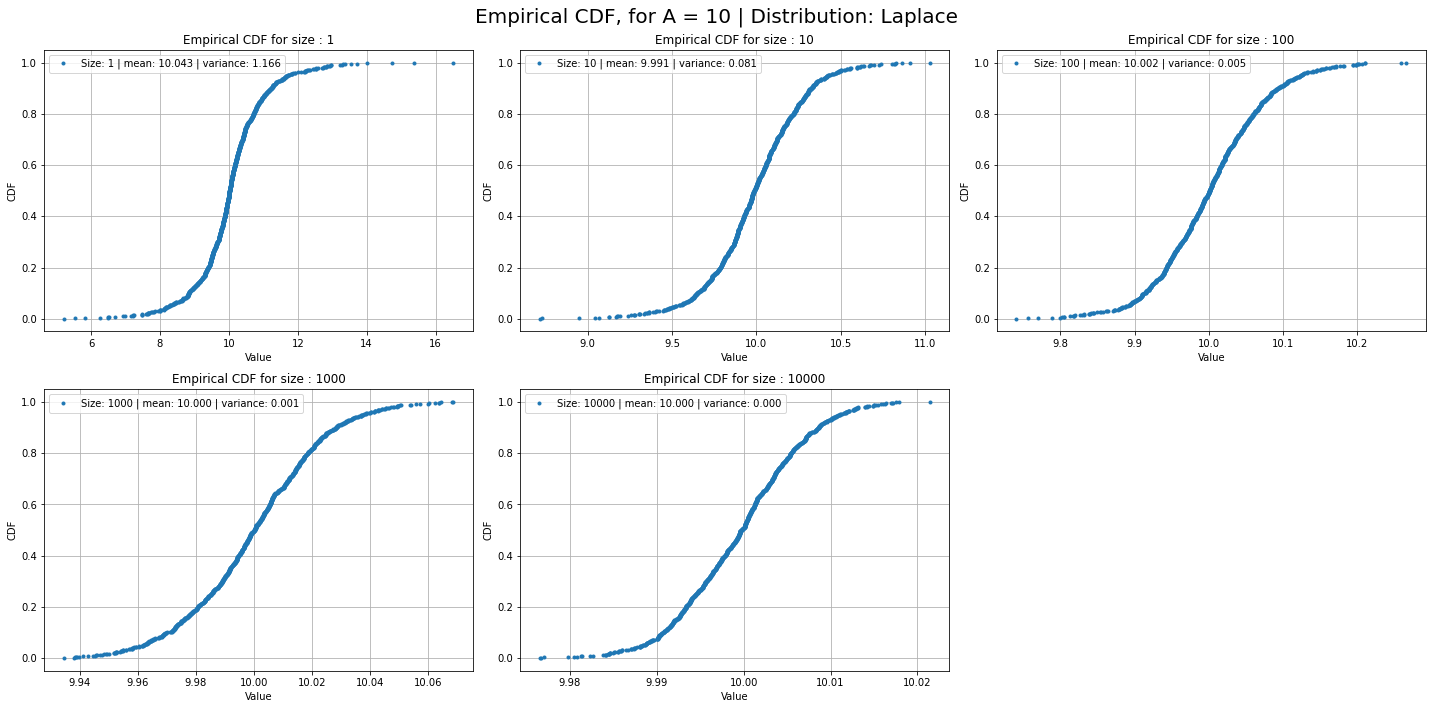

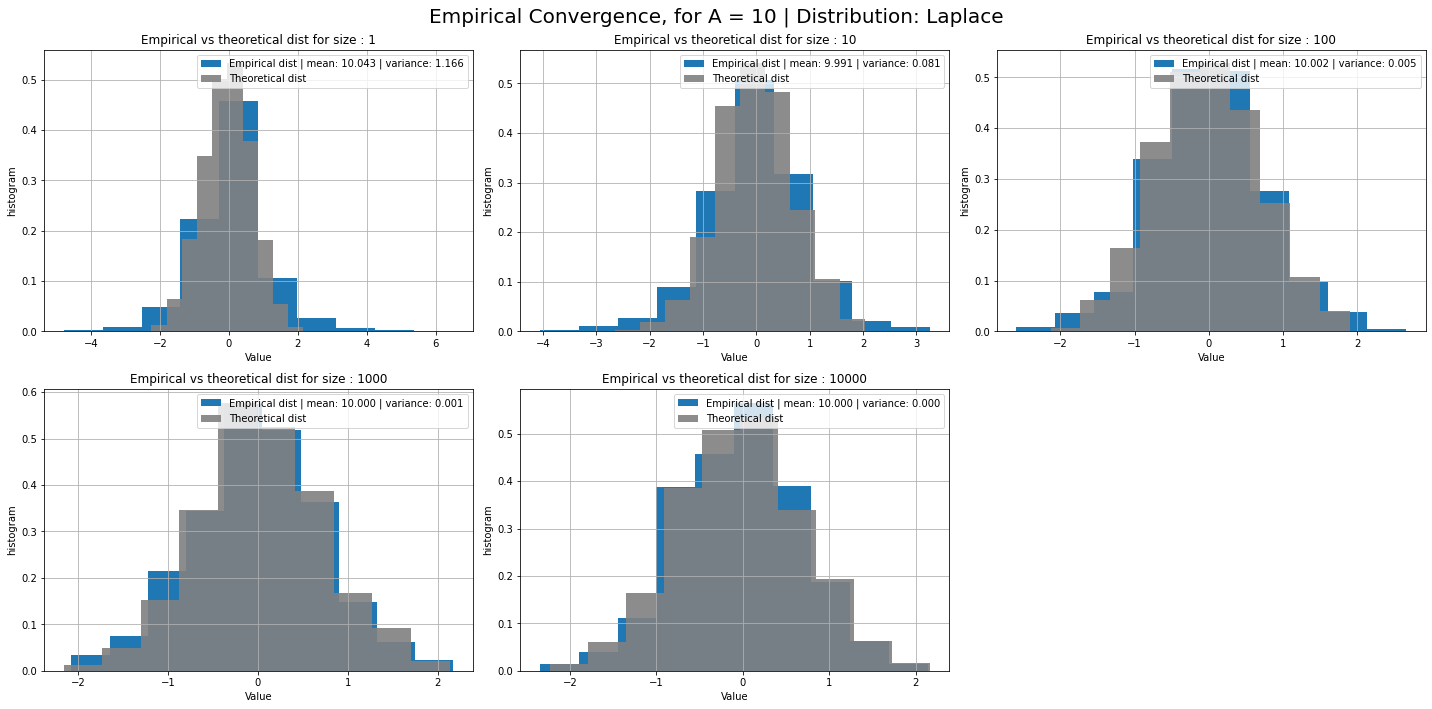

In [8]:
"""
Fisher info = n/b**2
Fisher info = 2 (here , for n = 1, b = 1/(2**0.5))

"""
plot_cdf(Laplace_A1, A = 1, dist = "Laplace")
convergence_plot(Laplace_A1, fisher_info = 2, A = 1, dist = "Laplace")

plot_cdf(Laplace_A10, A = 10, dist = "Laplace")
convergence_plot(Laplace_A10, fisher_info = 2, A = 10, dist = "Laplace")